<a href="https://colab.research.google.com/github/alireza-siami/Python_Projects/blob/DATAQUEST's-Projects/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Heart Disease**
It is a free guided project from DATQUEST. In this project, I will follow the instructions provided by that guided project. It provides a dataset from Kaggle gathered from some hospitals about cardiovascular diseases. Since heart diseases cause lots of deaths annually, it is important to find a trend to predict the probability of premature deaths. In this project, we will analyze data to see if we can figure out a trend.

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset as Panda dataframe
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##**EDA: Descriptive Statistics**

In [ ]:
# Print number of features and inputs
print(f'Number of features: {heart.shape[1]}\nNumber of inputs : {heart.shape[0]}\n')
heart.info()

Number of features: 12
Number of inputs : 918

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print(f'----Type of features----\n{heart.dtypes}')
heart.describe()

----Type of features----
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
print(heart['FastingBS'].value_counts())
print(heart['HeartDisease'].value_counts())

FastingBS
0    704
1    214
Name: count, dtype: int64
HeartDisease
1    508
0    410
Name: count, dtype: int64


From the above, we can notice which columns are categorical and which ones are numerical. However, 'FastingBS' and 'HeartDisease' columns are numerical but as their values are just 0, 1, we can consider them categorical.

It is also clear that there is not any missing data and the count of all features is 918. The mean age for heart disease is 53 which seems a little low. The minimum of 'RestingBP' and 'Cholesterol' is zero which is nonsense and it may mean that their data were missing and the dataset's creator filled missed data with zero. The median for 'Cholesterol' is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.

##**EDA: Visualizations**
Here, we draw bar plots for categorical features to see their distribution. Since 'HeartDisease'and'FastingBS' take only 0, 1, we also consider them as categorical features.

In [3]:
# Get the categorical columns
categorical = heart.select_dtypes(include='object').columns.tolist()
categorical = categorical + ['HeartDisease','FastingBS'] # add 'HeartDisease'and'FastingBS' to categorcal list
print(f'Number of categorical features : {len(categorical)}\n')
print(f'Categorical features :\n{categorical}')

Number of categorical features : 7

Categorical features :
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'FastingBS']


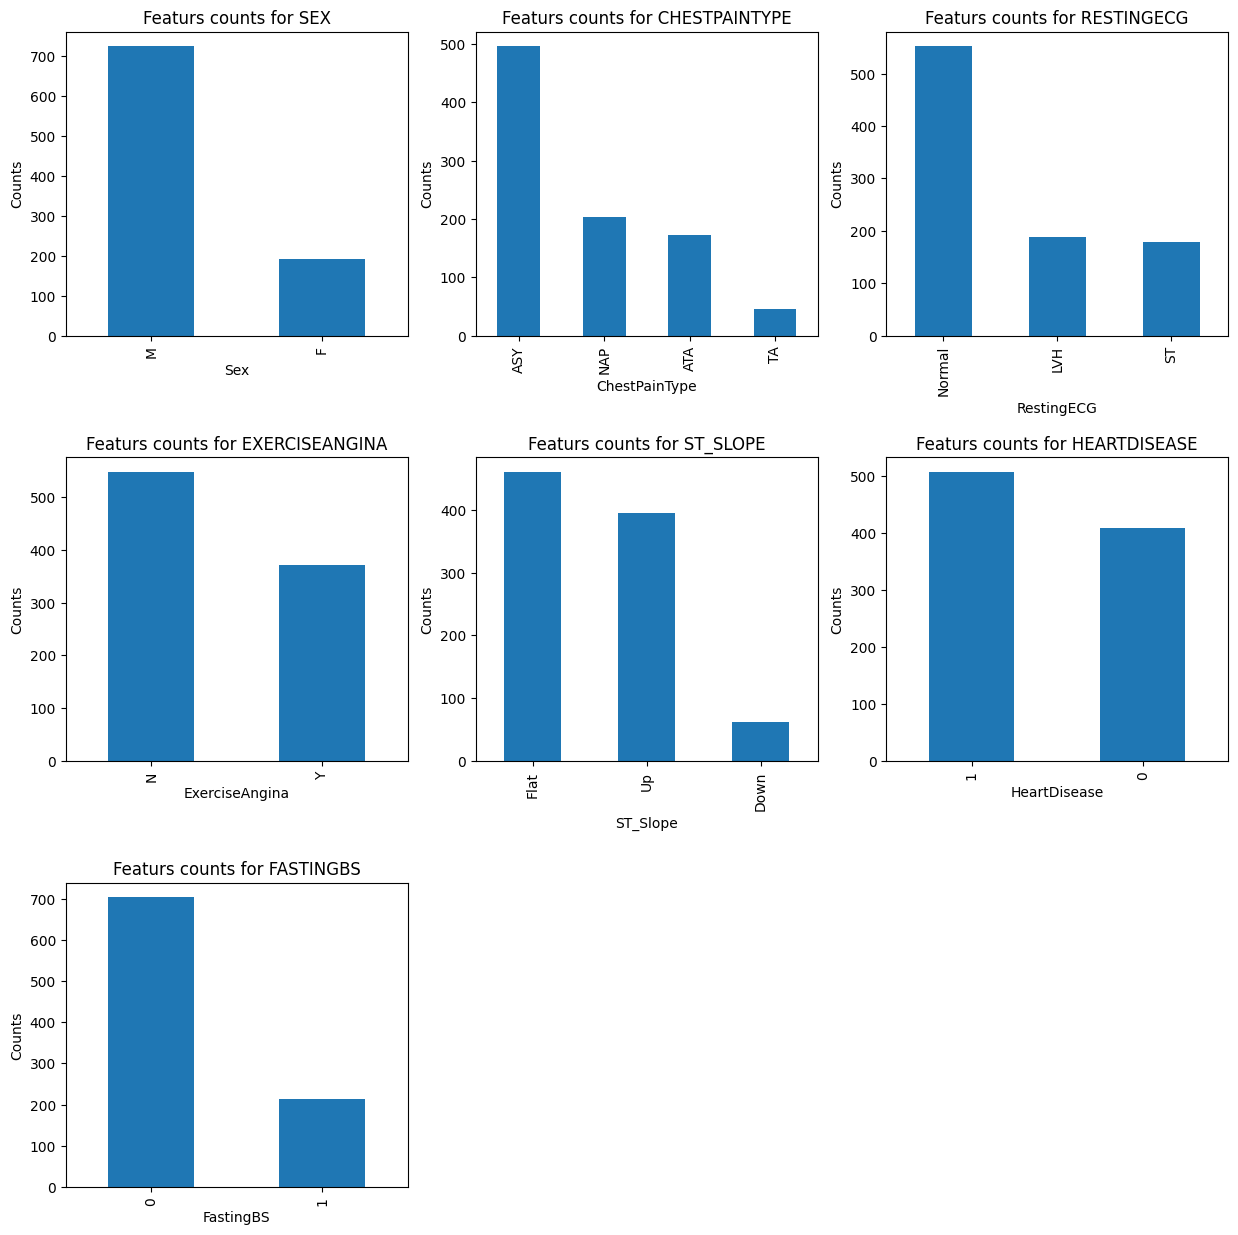

In [ ]:
# Bar plot of categorical features
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4)

for i, c in enumerate(categorical):
  ax = plt.subplot(3, 3, i+1)
  heart[c].value_counts().plot.bar(ax=ax)
  ax.set_title(f'Featurs counts for {c.upper()}')
  ax.set_ylabel('Counts')
plt.show()

Exploring the above information is interesting and may give us some insights about heart disease. For instance, the number of men for women is more than 3 times which shows that analytics on these data will be more reliable about men.
The distribution for 'HeartDisease' shows that we can get results from these data since the number of heart-healthy and heart-dead people in the data is almost equal. The number of zeros for 'FastingBS' may suggest that there is a weak correlation between heart disease and blood sugar.


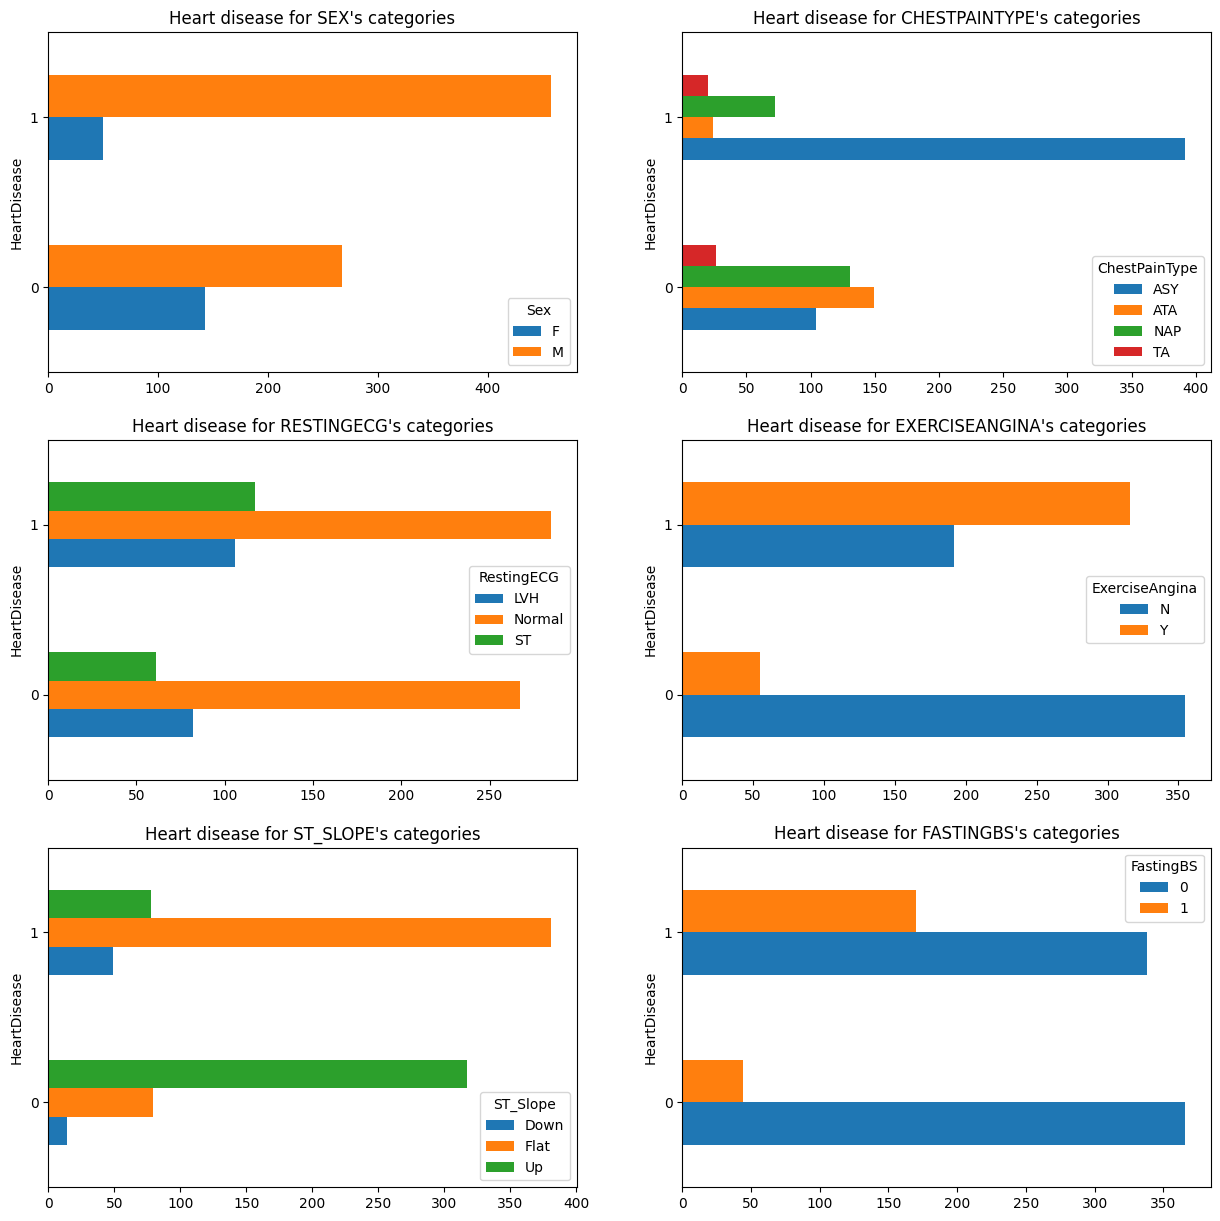

In [ ]:
plt.figure(figsize= (15,15))

i = 0
for c in categorical:
  if c != 'HeartDisease':
    i +=1
    ax = plt.subplot(3, 2, i)
    heart.groupby('HeartDisease')[c].value_counts().unstack().plot.barh(ax=ax)
    ax.set_title(f'Heart disease for {c.upper()}\'s categories')
plt.show()


In this section, we grouped other categorical parameters by 'HeartDisease' and tried to see their differences for 0 (normal) and 1 (heart disease). From the above plots, we can get some insight into dataset. For instance, from Sex Plot, it is clear that the dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.. Also, we can see that people with  ASY chest pain almost have heart problems while other pain does not mean that they have heart disease. From ExerciseAngina Polt we can see that individuals with exercise-induced angina are more prone to heart problems. The FastingBS plot shows us that high FastingBS correlates with high number of heart problems. A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not. Moreover, the plot for St_slope indicates that Down and Flat categories are more likely to have heart disease.

Here we want to look closer to the Sex and Age features. for instanse, what percentage of patients with heart disease are male and over 50 years old?

In [ ]:
# Percentage of men and women with heart disease
heart_disease = heart[heart['HeartDisease'] == 1]['Sex'].value_counts()/heart.shape[0]*100
male_heart_over50 = heart[(heart['Sex']=='M') & (heart['Age']>50) & (heart['HeartDisease'] == 1)]['Sex'].value_counts()/heart.shape[0] * 100
print(f'Percentage of patients with heart disease that are male and female:\n{heart_disease}\n')
print(f'Percentage of patients with heart disease that are male and over 50 years old:\n{male_heart_over50}')

Percentage of patients with heart disease that are male and female:
Sex
M    49.891068
F     5.446623
Name: count, dtype: float64

Percentage of patients with heart disease that are male and over 50 years old:
Sex
M    37.472767
Name: count, dtype: float64


Here we calculate the median age of patients who were diagnosed with heart disease.

In [ ]:
# Median age of patients who were diagnosed with heart disease
median_age = heart[heart['HeartDisease'] == 1]['Age'].median()
print(f'The median age of patients who were diagnosed with heart disease : {median_age}')

The median age of patients who were diagnosed with heart disease : 57.0


As we saw, 'Cholesterol' and 'RestingBP' have some zeroes, which is not sensible. So, it is better to remove these rows and replace them with a more reasonable amount. First, we calculate the number of zeroes each of these features has. Then, we replace those values with the median value of the corresponding column and the corresponding HeartDisease value.

In [4]:
# Number of zeroes that 'Cholesterol' and 'FastingBS' have
n_zero_chol = heart[heart['Cholesterol'] == 0].value_counts('Cholesterol')
n_zero_rest = heart[heart['RestingBP'] == 0].value_counts('RestingBP')
print(f'Number of zeroes for Cholesterol column:\n{n_zero_chol}\n')
print(f'Number of zeroes for RestingBP column:\n{n_zero_rest}')

Number of zeroes for Cholesterol column:
Cholesterol
0    172
Name: count, dtype: int64

Number of zeroes for RestingBP column:
RestingBP
0    1
Name: count, dtype: int64


In [5]:
heart_without_zeroes = heart.copy()
chol_hd0_med = heart.groupby('HeartDisease')['Cholesterol'].median()[0]
chol_hd1_med = heart.groupby('HeartDisease')['Cholesterol'].median()[1]

heart_without_zeroes[heart_without_zeroes['HeartDisease'] == 0] = heart_without_zeroes[heart_without_zeroes['HeartDisease'] == 0].replace({'Cholesterol':0}, chol_hd0_med)
heart_without_zeroes[heart_without_zeroes['HeartDisease'] == 1] = heart_without_zeroes[heart_without_zeroes['HeartDisease'] == 1].replace({'Cholesterol':0}, chol_hd1_med)

rest_hd0_med = heart.groupby('HeartDisease')['RestingBP'].median()[1] #since there is only one zero for RestingBP and it is for whose have herat problems

heart_without_zeroes[heart_without_zeroes['HeartDisease'] == 1] = heart_without_zeroes[heart_without_zeroes['HeartDisease'] == 1].replace({'RestingBP':0}, rest_hd0_med)



In [6]:
heart_without_zeroes[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,918.000000,918.000000
mean,239.675381,132.540305
std,54.328249,17.989941
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


##**Feature Selection**

According to our EDA, we can identify some of the features that we could start with them to analyse data:
*   Age
*   Sex
*   ChestPainType
*   Cholesterol
*   FastingBS

We also try to find the more correlated features with heart disease. So here we first convert the categorical features into dummy variables then we create a Pearson's correlation heat map.

In [7]:
heart_dummy = pd.get_dummies(heart_without_zeroes, dtype= 'int')

In [8]:
heart_dummy.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [9]:
correlation = abs(heart_dummy.corr()) # since some of the correlations are negative, we take ads amount of the correlations

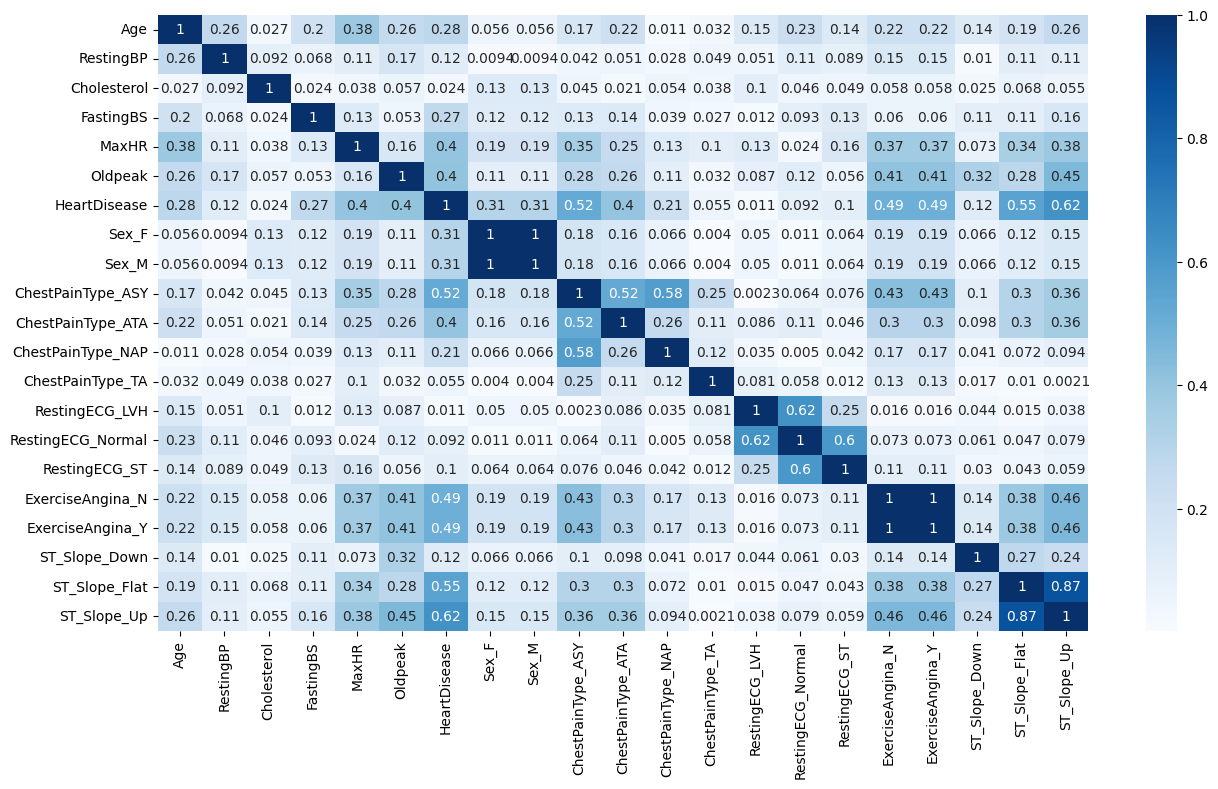

In [10]:
plt.figure(figsize= (15, 8))
sns.heatmap(correlation, annot= True, cmap= 'Blues')
plt.show()

Since there are lots of features and it is hard to determine which deatures are more corrolated with haert disease, here we draw heat map for features with corrolation more than 0.3.

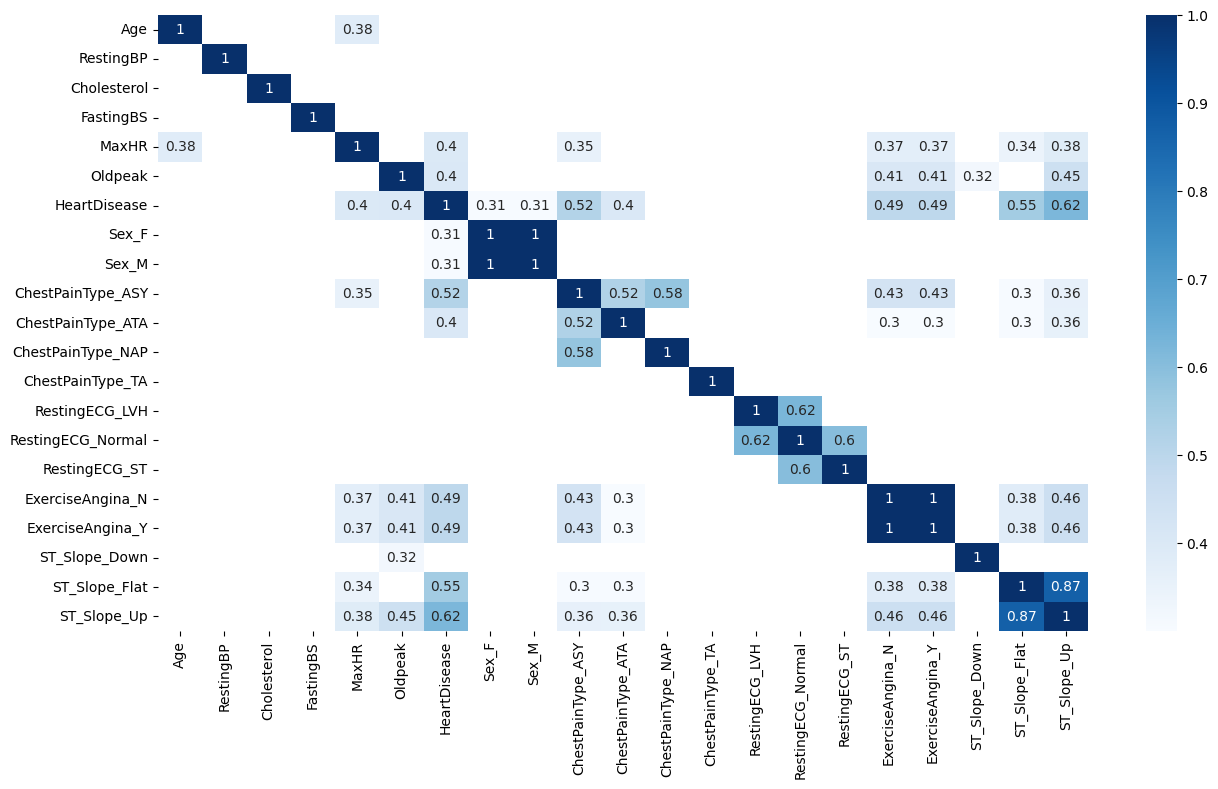

In [11]:
plt.figure(figsize= (15, 8))
sns.heatmap(correlation[correlation>0.3], annot= True, cmap= 'Blues')
plt.show()

From our correlation heatmap, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:

* Oldpeak
* MaxHR
* ChestPainType_ASY
* ChestPainType_ATA
* ExerciseAngina_N
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

The correlation coefficient threshold was chosen arbitrarily. Surprisingly, Cholesterol is not strongly correlated to HeartDisease. We can consider ignoring the feature for now.

Given everything we have attempted so far, we can narrow down our features to the following:

* Oldpeak
* Sex_M
It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account.
* ExerciseAngina_N
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

##**Building a Classifier I**

In [38]:
x = heart_dummy.drop(['HeartDisease'], axis=1)
y = heart_dummy['HeartDisease']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=417)

features = [
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_N",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

In [39]:
for feature in features:
  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(x_train[[feature]], y_train)
  score = clf.score(x_val[[feature]], y_val)
  print(f"Score for K-NN classifier with 3 neighbors for {feature.upper()} : {score*100:.2f}%")

Score for K-NN classifier with 3 neighbors for OLDPEAK : 69.57%
Score for K-NN classifier with 3 neighbors for SEX_M : 47.83%
Score for K-NN classifier with 3 neighbors for EXERCISEANGINA_N : 71.74%
Score for K-NN classifier with 3 neighbors for EXERCISEANGINA_Y : 71.74%
Score for K-NN classifier with 3 neighbors for ST_SLOPE_FLAT : 79.71%
Score for K-NN classifier with 3 neighbors for ST_SLOPE_UP : 82.61%


Our best forming model, with an accuracy of ~83%, was trained on the ST_Slope_Up feature with ST_Slope_Flat being a close second. These make sense given the data distributions we saw previously.

##**Building a Classifier II**
In the previous sextion, we trained classifier on each selected feature seperately. But noe we want to traine a model on all of these features together.
Before we do, it's important to note that our features are not yet normalized. Not all of the values are within the same range. We will first scale our data to the range (0, 1) before training our model. Note: We will only scale our selected features.

In [40]:
x_train_features = x_train[features]
x_val_features = x_val[features]

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_features)
x_val_scaled = scaler.transform(x_val_features)

In [42]:
clf_features = KNeighborsClassifier(n_neighbors=3)
clf_features.fit(x_train_scaled, y_train)
score = clf_features.score(x_val_scaled, y_val)
print(f"Score for K-NN classifier with 3 neighbors for all selected features : {score*100:.2f}")

Score for K-NN classifier with 3 neighbors for all selected features : 82.61


According to the accuracy of prvious section for ST_Slope_Up, we cannot see any progress in accuracy.

##**Hyperparameter Tuning**
Now we can experiment with the parameters and hyperparameters. We'll use GridSearchCV to search over those values to find best hyperparameters.

We will use grid search to explore the following range of values for a couple of hyperparameters:

* For k (n_neighbors in scikit-learn) we will use values in the range of 1 to 20.
* We will use two distance metrics - minkowski and manhattan.

In [57]:
grid_params = {'n_neighbors':range(1, 20), "metric": ["manhattan", "minkowski"]}

clf_grid = GridSearchCV(KNeighborsClassifier(), grid_params, scoring='accuracy', error_score='raise')
clf_grid.fit(x_train_scaled, y_train)

GridSearchCV(error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'minkowski'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [58]:
clf_grid.best_score_*100, clf_grid.best_params_

(84.48717948717949, {'metric': 'manhattan', 'n_neighbors': 12})

Our best model had an accuracy of ~84% with 12 n_neighbors and manhattan as the distance metric.

The accuracy of this model is only slightly better.

##**Model Evaluation on Test Set**

In [63]:
best_estimator = clf_grid.best_estimator_
test_score = best_estimator.score(x_val_scaled, y_val)
print(f" Model Accuracy on test set: {test_score*100:.2f}")

 Model Accuracy on test set: 84.78


Our model got an accuracy of ~85%. That's good! This means that our model is likely to correctly predict whether a patient is at risk for a heart disease ~85% of the time.

##**Refrences**
Guided project page:

https://www.dataquest.io/projects/guided-project-a-predicting-heart-disease/

Datasets:

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction